# Caso práctico 

# Estimación de Precios de Vehículos de Segunda Mano para Ciudadanos No Nacionales


En este proyecto, abordaremos la estimación de precios de vehículos de segunda mano dirigidos a ciudadanos no nacionales residentes en España. Nuestra empresa, especializada en servicios de telecomunicaciones, busca diversificar su oferta y ha identificado el mercado de coches usados como un nicho potencial. A través de encuestas a nuestros clientes, hemos confirmado el interés en la compra de vehículos.

## Objetivo:

El objetivo principal es desarrollar un modelo de estimación de precios para los vehículos de segunda mano. Para ello, utilizaremos la metodología **CRISP-DM** (Cross-Industry Standard Process for Data Mining) y aprovecharemos un conjunto de datos (vehiculos_segunda_mano.csv) que contiene información sobre las ventas de vehículos usados.

## 1. Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Como pide el enunciado, utilizaremos la metodología CRISP-DM para estimar el precio de un vehículo.

## 2. Entendimiento del negocio

La compañía ha detectado un posible nicho de mercado en el área de vehículos de segunda mano. Se le ha pedido al área Ciencia de Datos la estimación del precio de cada vehículo. Para ello utilizaremos concretamente la columna **Precio** del dataset **vehiculos_segunda_mano**.

## 3. Entendimiento de los datos

Primero vamos a subir el fichero y ver su contenido.

In [2]:
v_df = pd.read_csv("vehiculos_segunda_mano.csv", encoding="latin-1")

In [3]:
v_df.head()

,Marca,Modelo,Año,Combustible,CV,Cilindros,Transmisión,Tracción,Puertas,Mercado,Tamaño,Estilo,Consumo Carretera,Consumo Ciudad,Popularidad,Precio
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Vemos los tipos de datos de cada variable.

In [4]:
v_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Marca              11914 non-null  object 
 1   Modelo             11914 non-null  object 
 2   Año                11914 non-null  int64  
 3   Combustible        11911 non-null  object 
 4   CV                 11845 non-null  float64
 5   Cilindros          11884 non-null  float64
 6   Transmisión        11914 non-null  object 
 7   Tracción           11914 non-null  object 
 8   Puertas            11908 non-null  float64
 9   Mercado            8172 non-null   object 
 10  Tamaño             11914 non-null  object 
 11  Estilo             11914 non-null  object 
 12  Consumo Carretera  11914 non-null  int64  
 13  Consumo Ciudad     11914 non-null  int64  
 14  Popularidad        11914 non-null  int64  
 15  Precio             11914 non-null  int64  
dtypes: float64(3), int64(5

### 3.1 Análisis Univariante

Utilizaremos el método *describe()* de **pandas** para analizar los datos, su tipo, y sus estadísticos básicos.

Procederemos ahora a realizar el análisis univariante de las variables cualitativas primero.

#### 3.1.1 Variables Cualitativas

In [5]:
v_df.describe(include="object") # Al agregarle include="object" analizamos las variables cualitativas.

,Marca,Modelo,Combustible,Transmisión,Tracción,Mercado,Tamaño,Estilo
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


Como se puede observar por medio del método describe utilizado anteriormente, tenemos 3 variables numéricas que podemos considerarlas para fines de análisis como categóricas. Las mismas son: **Año, Cilindros y Puertas**.

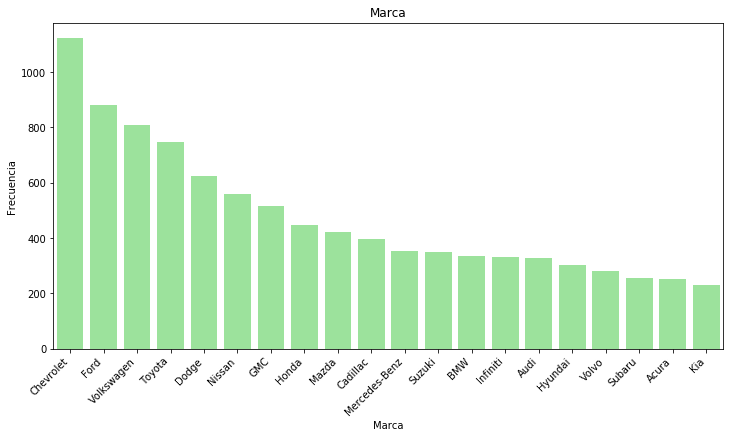

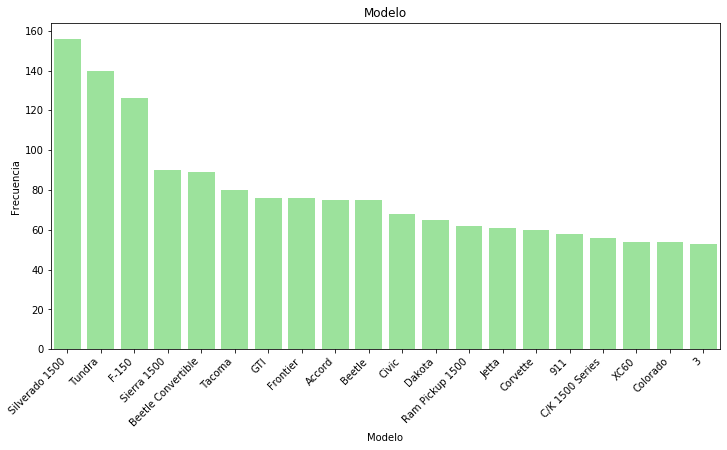

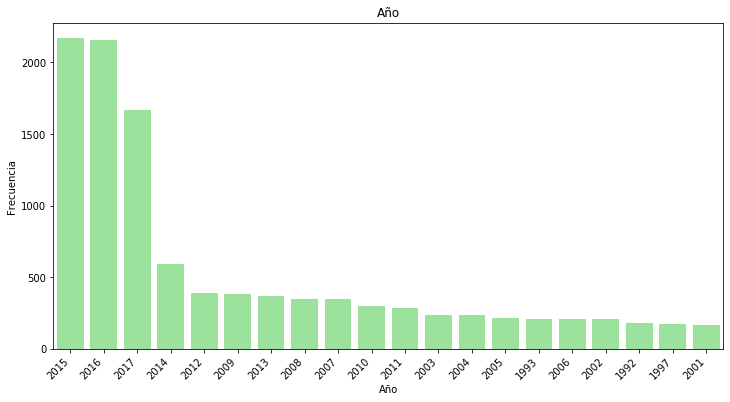

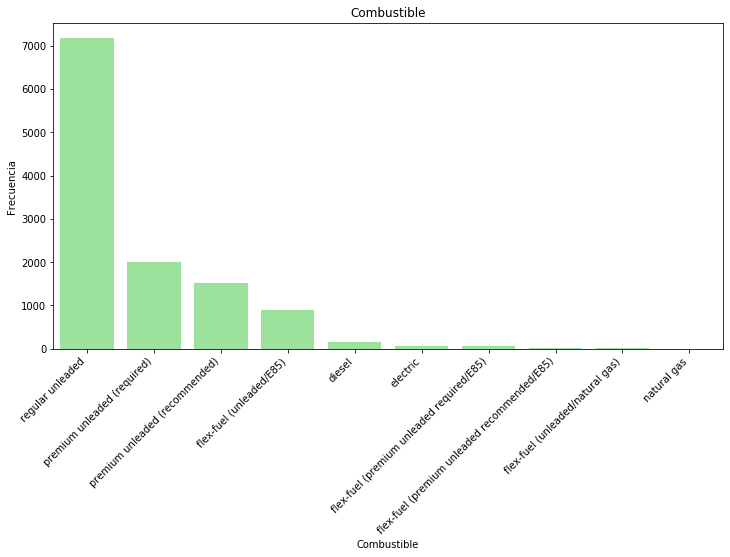

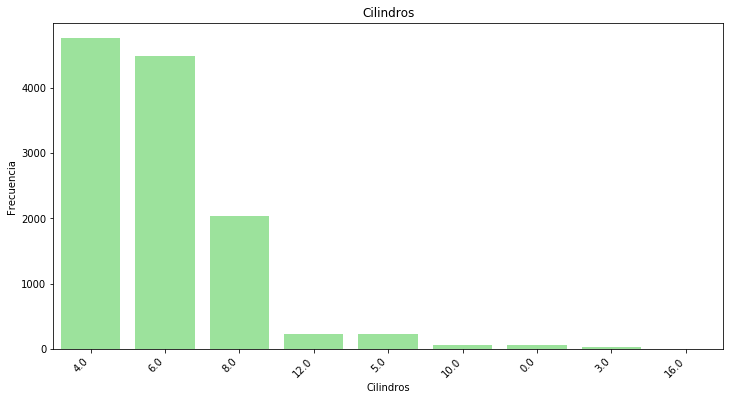

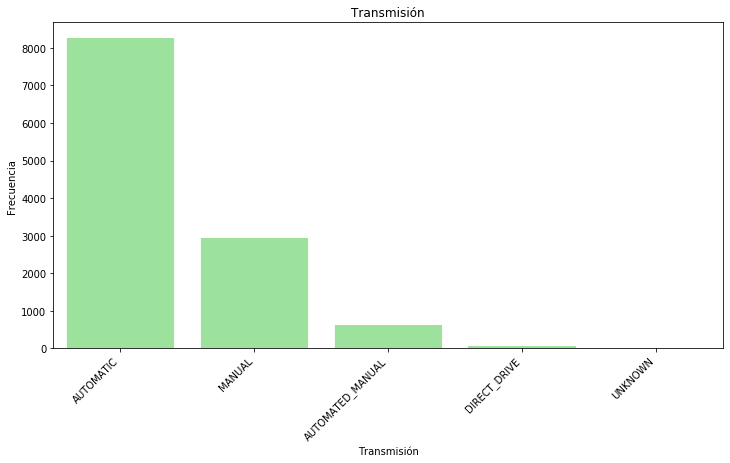

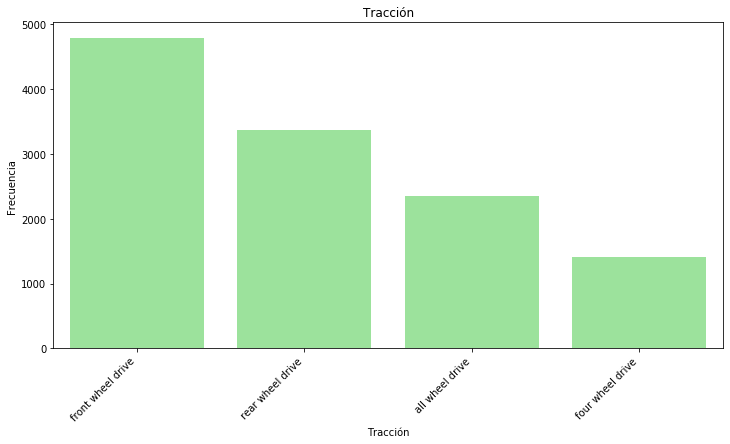

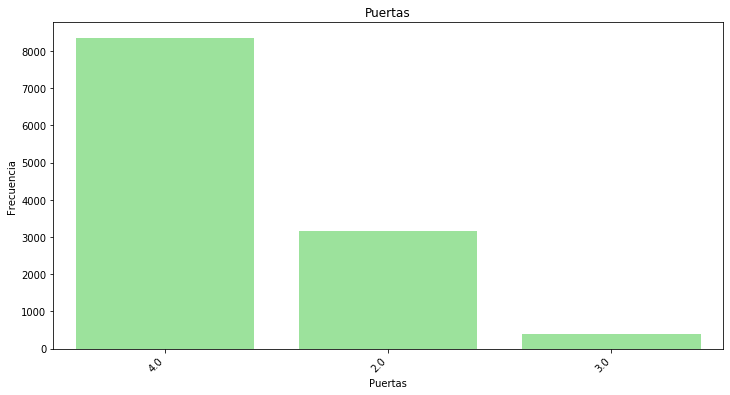

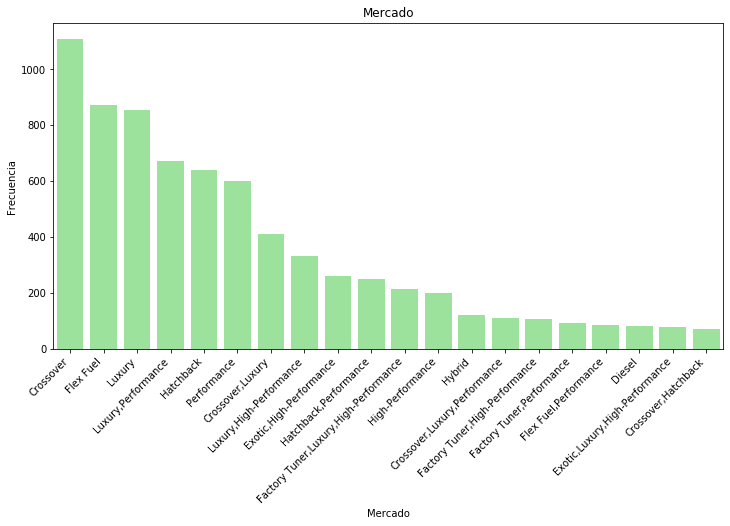

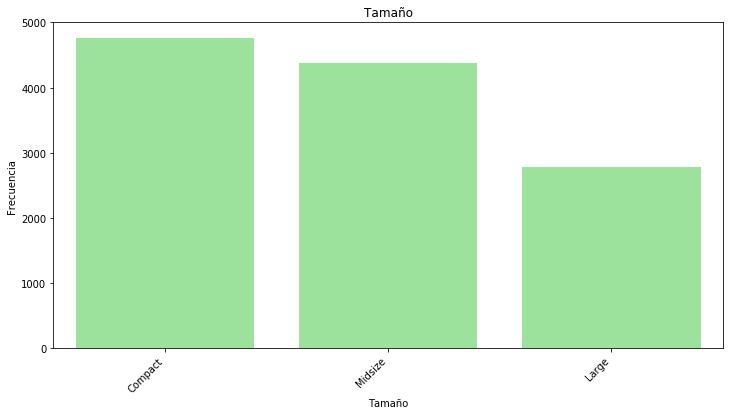

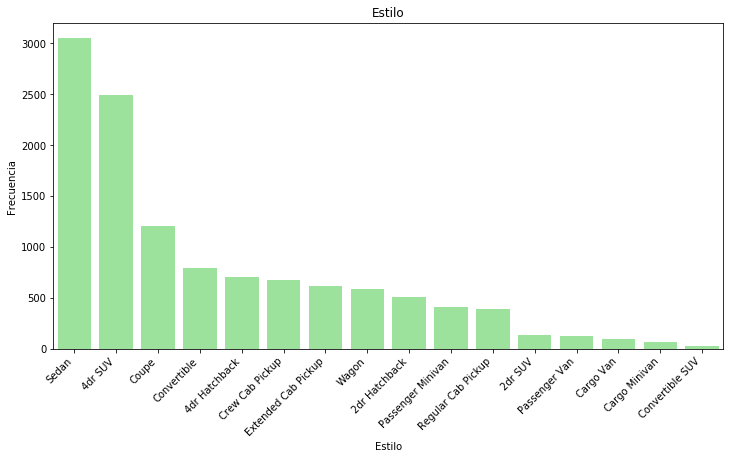

In [6]:
for i in v_df.columns:
    if (v_df[i].dtype == 'O') or (i in (["Año", "Cilindros", "Puertas"])):  
      fig, ax = plt.subplots(figsize=(12,6))
      chart = sns.countplot(data=v_df, x=i, color='lightgreen', order = v_df[i].value_counts().index[:20])
      chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');
      chart.set_ylabel('Frecuencia');
      chart.set_title(i);
      plt.show();

#### 3.1.2 Variables Cuantitativas

Utilizaremos un histograma para visualizar las variables cuantitativas

In [7]:
v_df.describe() # Analizamos las variables cuantitativas, tanto continuas como discretas.

,Año,CV,Cilindros,Puertas,Consumo Carretera,Consumo Ciudad,Popularidad,Precio
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


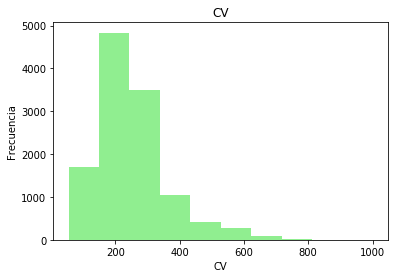

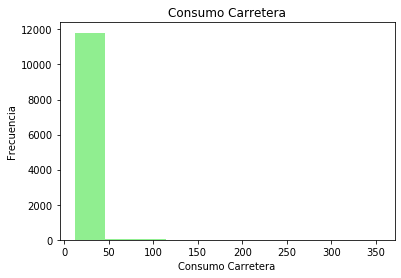

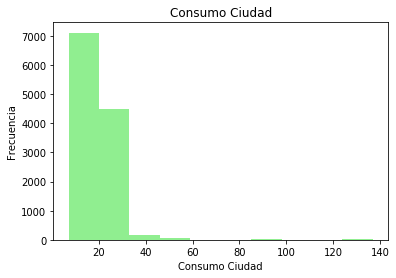

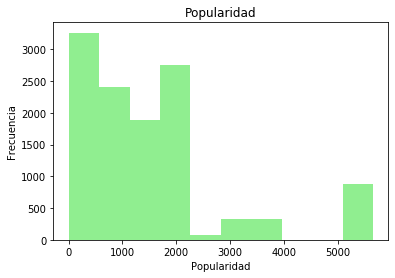

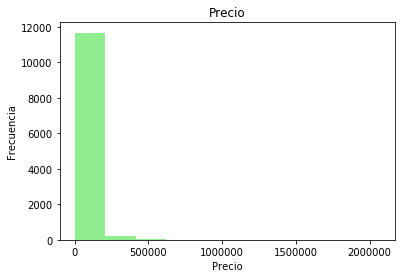

In [8]:
for i in v_df.columns:
    if v_df[i].dtype != 'O' and i not in(["Año", "Cilindros", "Puertas"]): 
        plt.hist(v_df[i], color="lightgreen")
        plt.xlabel(i)
        plt.ylabel('Frecuencia')
        plt.title(i)
        plt.show()

### 3.2 Análisis Bivariante

Vamos a realizar el análisis de cada variable frente a la variable objetivo que en este caso es **Precio**.

#### 3.2.1 Análisis variables cualitativas Vs. variable objetivo

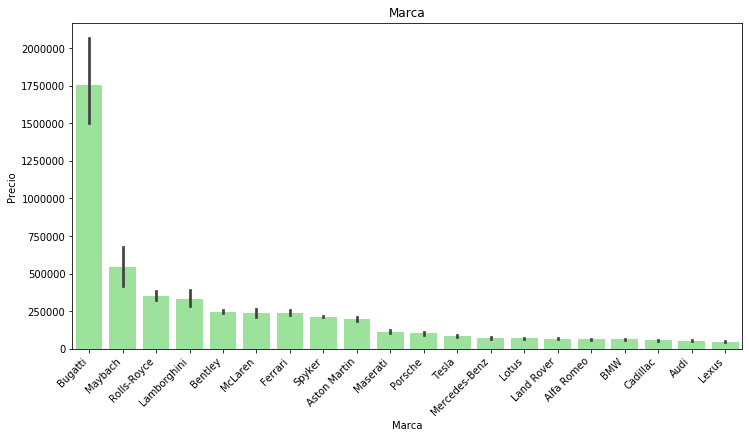

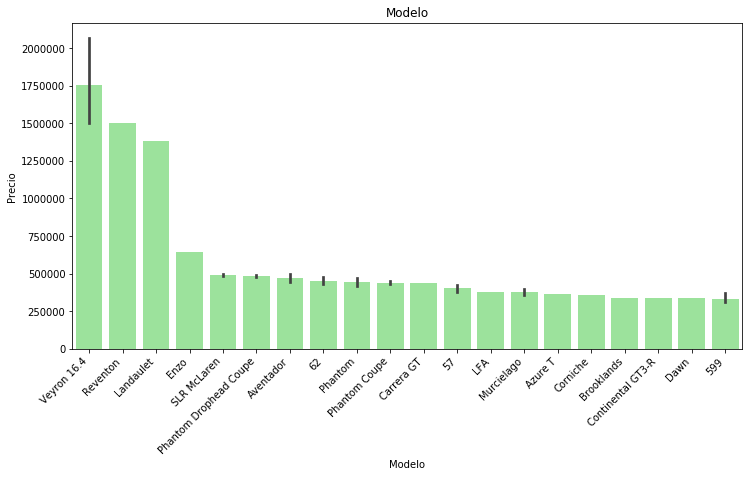

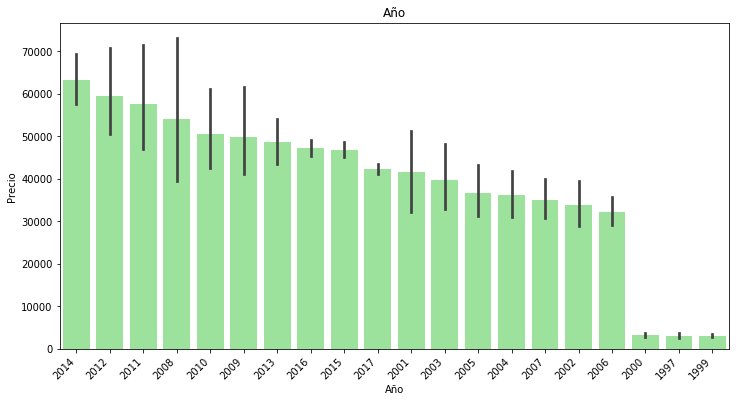

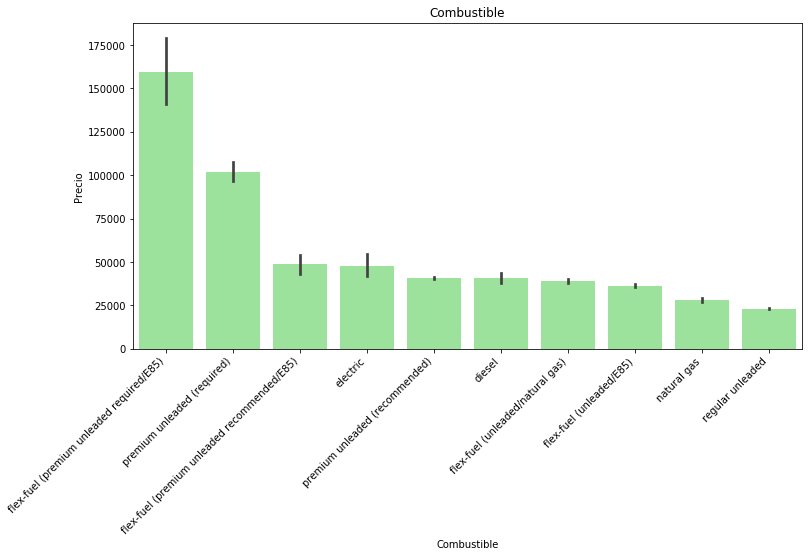

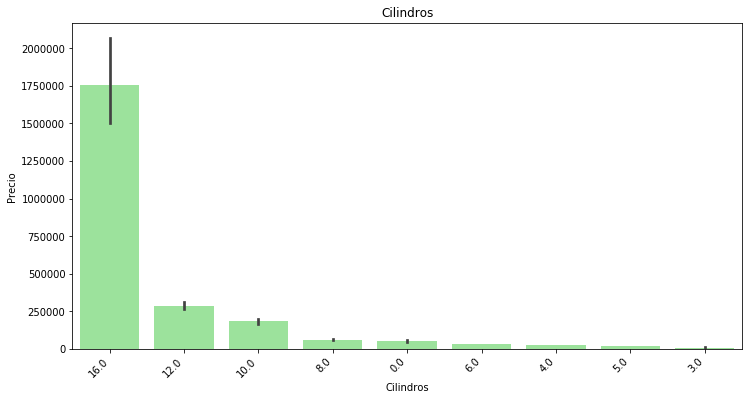

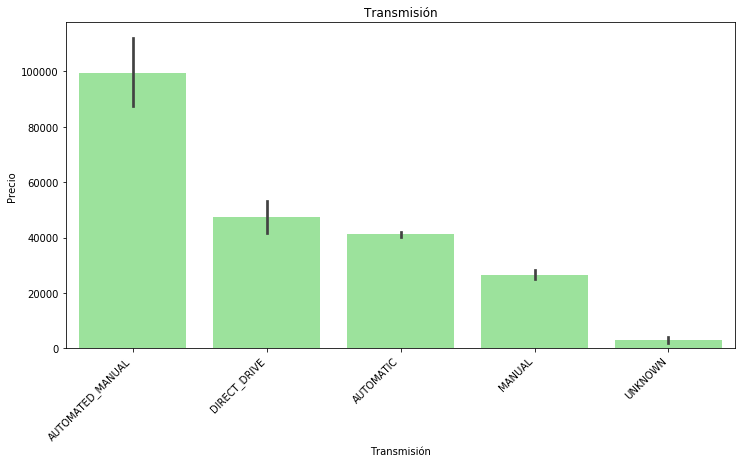

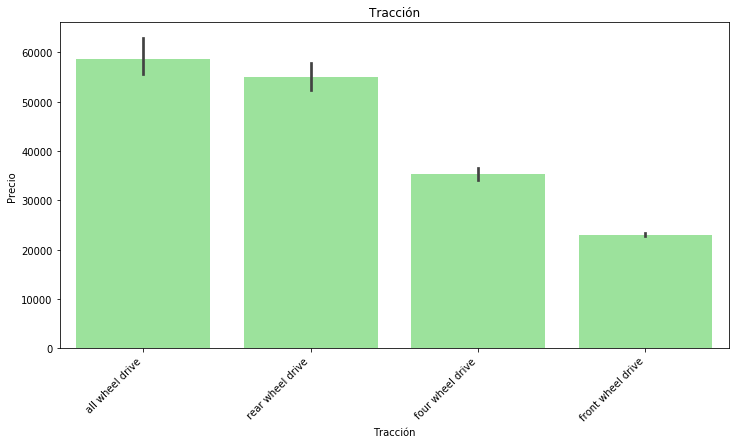

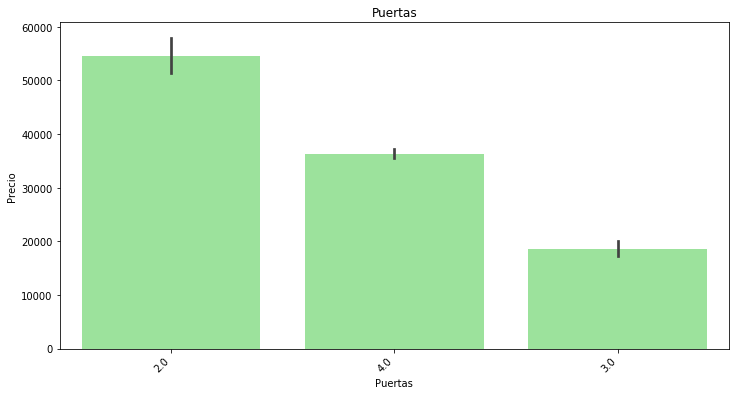

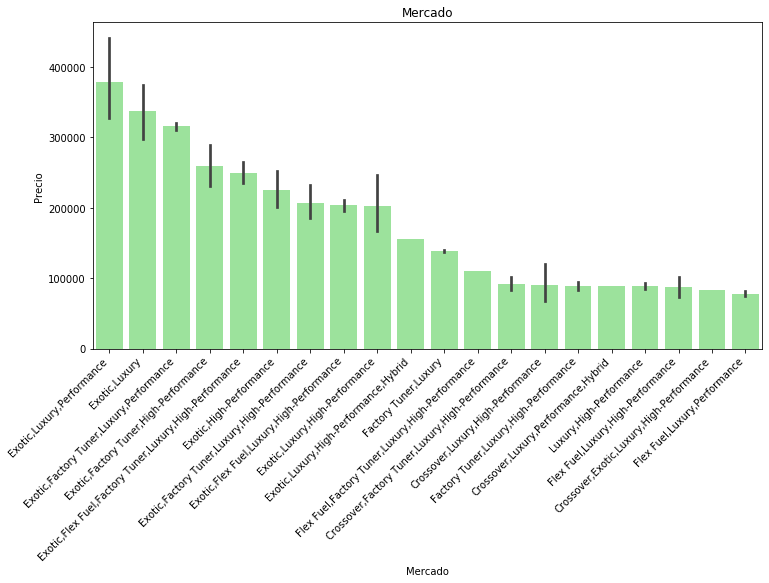

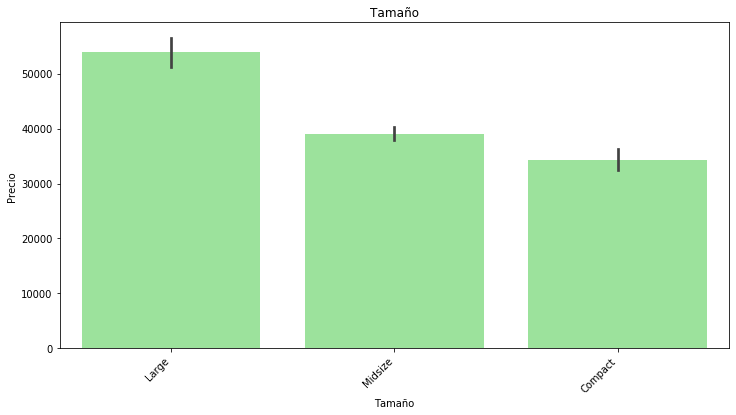

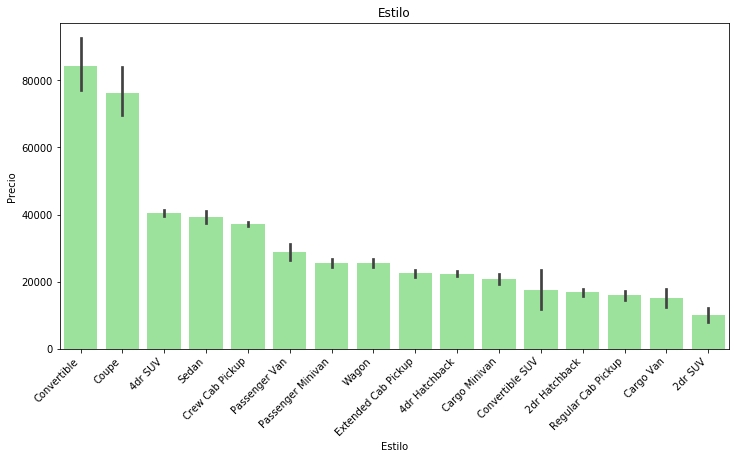

In [9]:
for i in v_df.columns:
    if v_df[i].dtype == 'O' or i in(["Año", "Cilindros", "Puertas"]):  
      fig, ax = plt.subplots(figsize=(12,6))
      chart = sns.barplot(data=v_df, x=i, y="Precio", color='lightgreen', order = v_df.groupby(i)["Precio"].mean().sort_values(ascending=False).index[:20])
      chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');
      chart.set_ylabel('Precio');
      chart.set_title(i);
      plt.show();

**Observaciones**:
* La marca y el modelo más caro, como es de esperarse es la **Bugatti**, y su modelo **Veyron 16.4**.
* Los precios de los vehículos anterior al año 2000 son muy bajos en comparación con los demás.

#### 3.2.2 Análisis variable cuantitativa Vs. variable objetivo

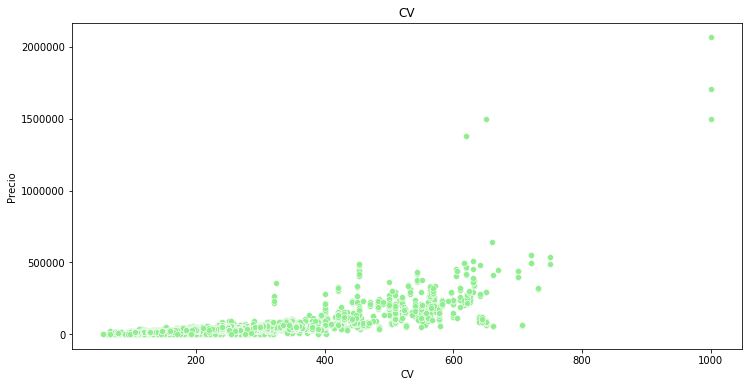

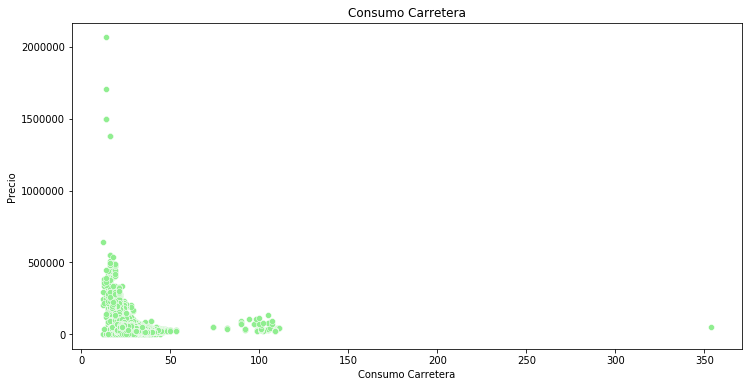

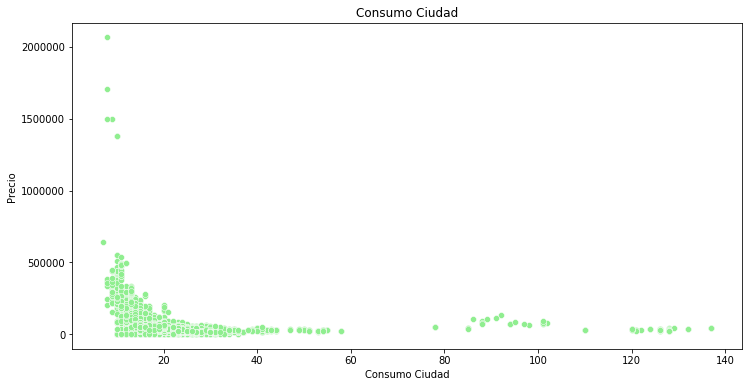

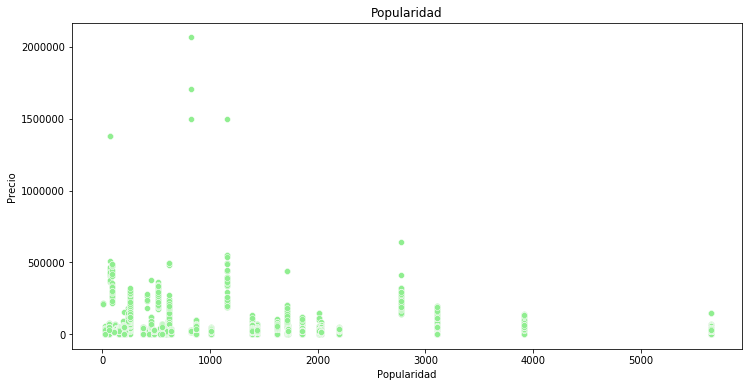

In [10]:
for i in v_df.columns:
    if (v_df[i].dtype != 'O') and (i != "Precio") and (i not in (["Año", "Cilindros", "Puertas"])):  
      fig, ax = plt.subplots(figsize=(12,6))
      chart = sns.scatterplot(data=v_df, x=i, y="Precio", color='lightgreen')
      chart.set_title(i);
      plt.show();

**Observaciones**:
* Vemos cierta correlación positiva con la variable **CV** y la variable **Precio**, pero hay vehículos que por su estilo o modelo, al ser tan caros, no permiten que se vea con claridad dicha relación.

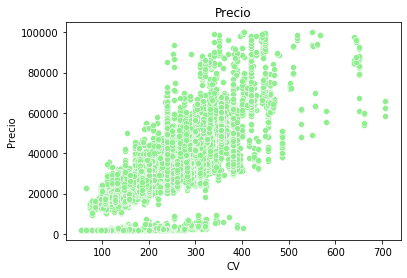

In [11]:
chart = sns.scatterplot(data=v_df[v_df["Precio"] < 100000], x="CV", y="Precio", color='lightgreen')
chart.set_title(i);
plt.show();

### 3.3 Análisis Multivariante

En el siguiente mapa de calor podemos ver la correlación entre las distintas variables numéricas.

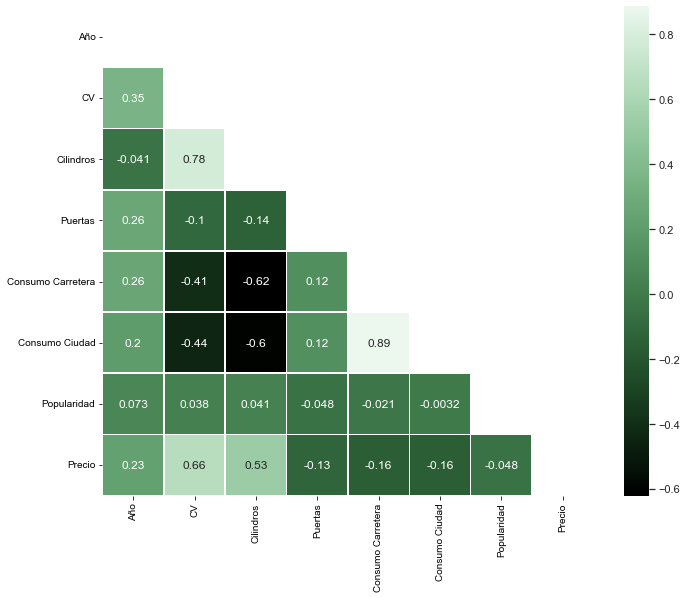

In [13]:
corr = v_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set_theme(style="white")

sns.heatmap(corr, mask=mask, cmap=cmap, linewidths=.5, annot=True);

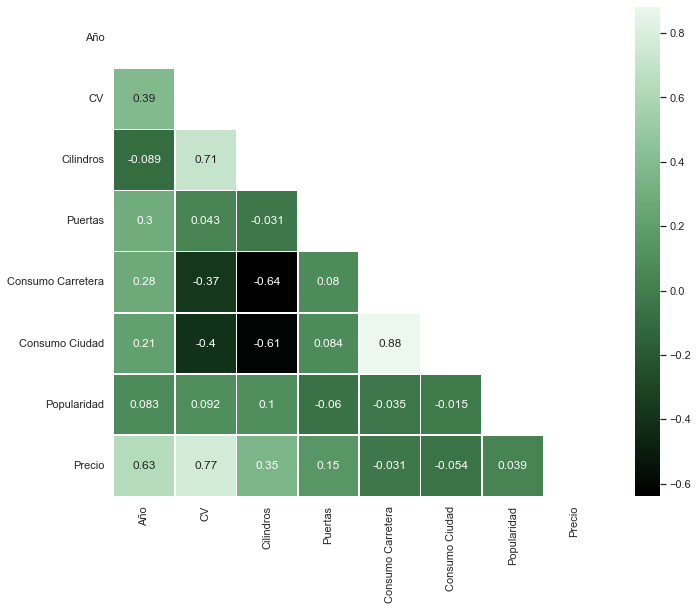

In [15]:
corr = v_df[v_df["Precio"] < 100000].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.set_theme(style="white")

sns.heatmap(corr, mask=mask, cmap=cmap, linewidths=.5, annot=True);

Vemos como al eliminar aquellos valores extremos de la columna **Precio**, la correlación entre la variable Precio y las variables **Año** y **CV** aumentan considerablemente.

### 3.4 Calidad del Dato

#### 3.4.1 Detectar valores nulos

In [17]:
print("Total de valores nulos")
v_df.isnull().sum()

Total de valores nulos


Marca                   0
Modelo                  0
Año                     0
Combustible             3
CV                     69
Cilindros              30
Transmisión             0
Tracción                0
Puertas                 6
Mercado              3742
Tamaño                  0
Estilo                  0
Consumo Carretera       0
Consumo Ciudad          0
Popularidad             0
Precio                  0
dtype: int64

In [18]:
print("Porcentaje de nulos respecto al total de datos")
v_df.isnull().sum() / len(v_df) * 100

Porcentaje de nulos respecto al total de datos


Marca                 0.000000
Modelo                0.000000
Año                   0.000000
Combustible           0.025180
CV                    0.579151
Cilindros             0.251805
Transmisión           0.000000
Tracción              0.000000
Puertas               0.050361
Mercado              31.408427
Tamaño                0.000000
Estilo                0.000000
Consumo Carretera     0.000000
Consumo Ciudad        0.000000
Popularidad           0.000000
Precio                0.000000
dtype: float64

#### 3.4.2 Detectar valores atípicos

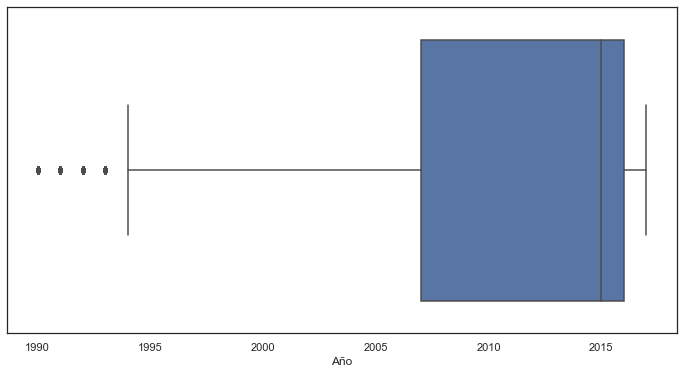

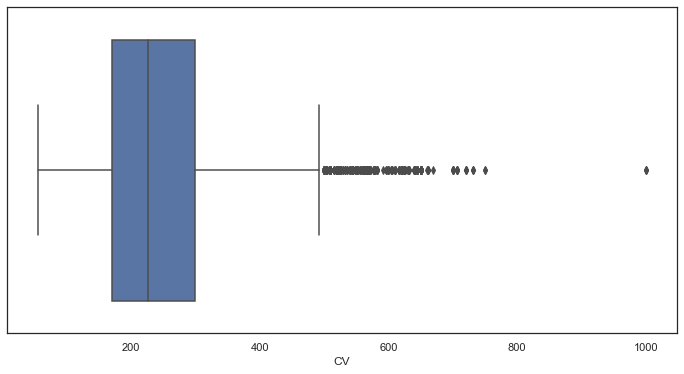

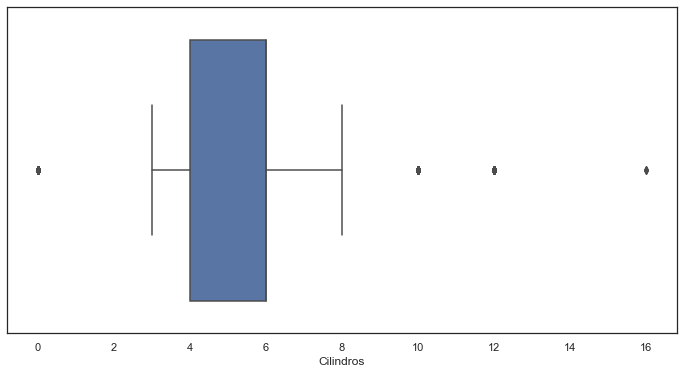

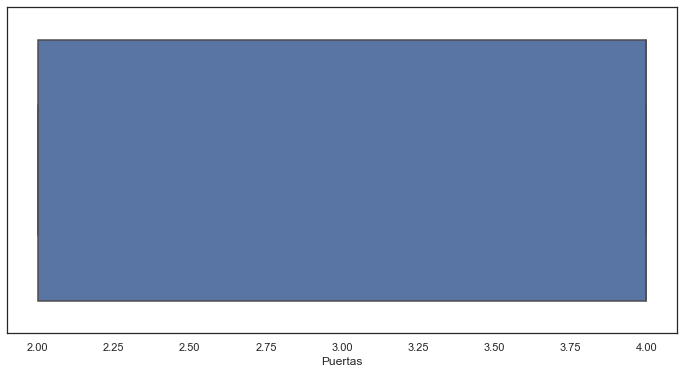

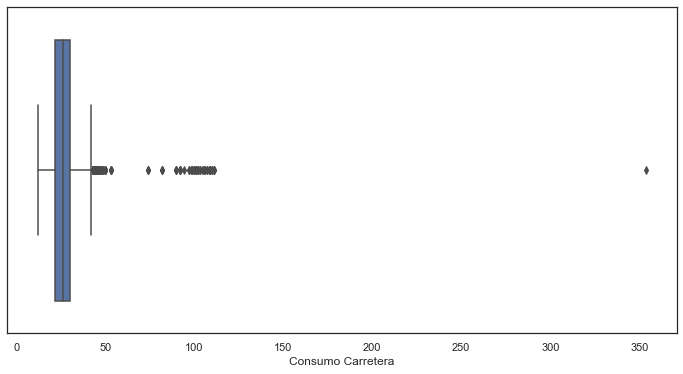

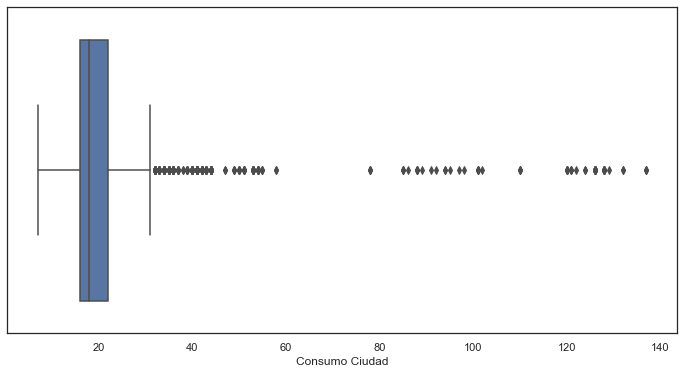

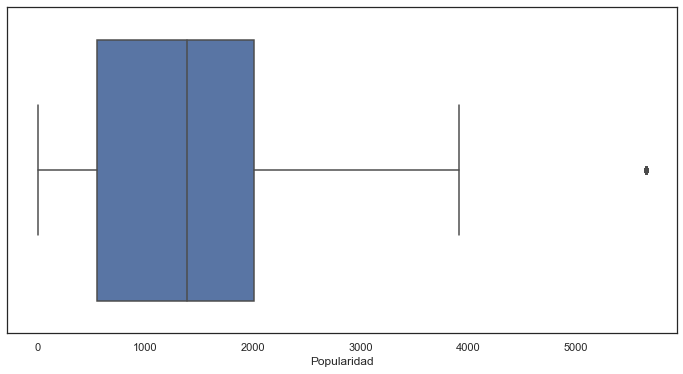

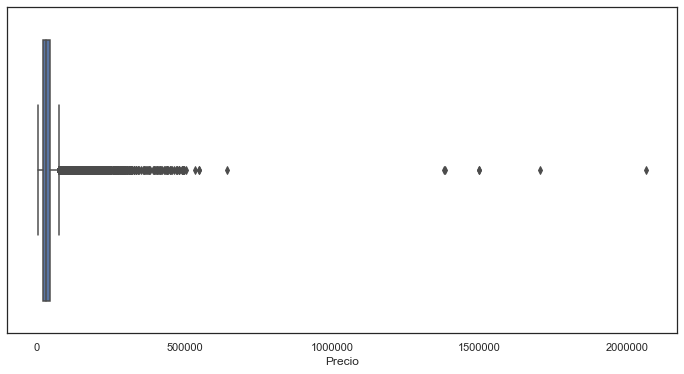

In [19]:
for i in v_df.columns:
    if v_df[i].dtype != "O":
        fig, ax = plt.subplots(figsize=(12,6))
        sns.boxplot(data=v_df, x=i)

## 4. Preparación de los datos

### 4.1 Transformar valores nulos

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
si = SimpleImputer(strategy="most_frequent")

In [23]:
v_df[["Combustible", "Mercado", "CV", "Cilindros", "Puertas"]] = si.fit_transform(v_df[["Combustible", "Mercado", "CV", "Cilindros", "Puertas"]])

In [24]:
print("Total de valores nulos")
v_df.isnull().sum()

Total de valores nulos


Marca                0
Modelo               0
Año                  0
Combustible          0
CV                   0
Cilindros            0
Transmisión          0
Tracción             0
Puertas              0
Mercado              0
Tamaño               0
Estilo               0
Consumo Carretera    0
Consumo Ciudad       0
Popularidad          0
Precio               0
dtype: int64

In [26]:
v_df[["CV", "Cilindros", "Puertas"]] = v_df[["CV", "Cilindros", "Puertas"]].astype("float64")

### 4.2 Eliminar valores atípicos.

Como la compañía tiene un enfoque económico, ya que ofrece planes relativamente baratos a sus clientes, considero prudente eliminar esos outliers, específicamente aquellos del campo **Precio** que, como se muestran en el método *describe()* llegan a montos de **2 millones de euros**.

In [28]:
v_df.describe()["Precio"]

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: Precio, dtype: float64

In [29]:
print("Total de filas del dataframe: {}".format(len(v_df)))
for i in v_df.columns:
    if v_df[i].dtype != "O":
        q1 = np.quantile(v_df[i], 0.25)
        q3 = np.quantile(v_df[i], 0.75)
        iqr = q3 - q1
        print("Porcentaje de outliers columna {}: {}%.".format(i, round((len(v_df[v_df[i] > (q3 + 1.5 * iqr)]) / len(v_df) * 100) + (len(v_df[v_df[i] < (q1 - 1.5 * iqr)]) / len(v_df) * 100), 2)))
q1 = v_df["Precio"].quantile(0.25)
q3 = v_df["Precio"].quantile(0.75)
iqr = q3 - q1
v_df2 = v_df[~((v_df["Precio"] < (q1 - 1.5 * iqr)) | (v_df["Precio"] > (q3 + 1.5 * iqr)))]
print("---------------------------------------------------------")
print("Total de filas nuevo dataframe: {}".format(len(v_df2)))
for i in v_df2.columns:
    if v_df2[i].dtype !="O":
        q1 = np.quantile(v_df2[i], 0.25)
        q3 = np.quantile(v_df2[i], 0.75)
        iqr = q3 - q1
        print("Porcentaje de outliers columna {}: {}%.".format(i, round((len(v_df2[v_df2[i] > (q3 + 1.5 * iqr)]) / len(v_df2) * 100) + (len(v_df2[v_df2[i] < (q1 - 1.5 * iqr)]) / len(v_df2) * 100), 2)))

Total de filas del dataframe: 11914
Porcentaje de outliers columna Año: 5.55%.
Porcentaje de outliers columna CV: 4.27%.
Porcentaje de outliers columna Cilindros: 3.0%.
Porcentaje de outliers columna Puertas: 0.0%.
Porcentaje de outliers columna Consumo Carretera: 1.61%.
Porcentaje de outliers columna Consumo Ciudad: 2.65%.
Porcentaje de outliers columna Popularidad: 7.39%.
Porcentaje de outliers columna Precio: 8.36%.
---------------------------------------------------------
Total de filas nuevo dataframe: 10918
Porcentaje de outliers columna Año: 1.13%.
Porcentaje de outliers columna CV: 0.73%.
Porcentaje de outliers columna Cilindros: 0.48%.
Porcentaje de outliers columna Puertas: 0.0%.
Porcentaje de outliers columna Consumo Carretera: 1.16%.
Porcentaje de outliers columna Consumo Ciudad: 2.78%.
Porcentaje de outliers columna Popularidad: 8.05%.
Porcentaje de outliers columna Precio: 1.67%.


Todavía se detectan outliers en la columna **Precio** luego de removerlos, pero esto se debe a que al ser removidos los outliers los datos han sido alterados, por ende el dataframe tiene nuevos valores estadísticos. 

In [30]:
v_df2.describe()

,Año,CV,Cilindros,Puertas,Consumo Carretera,Consumo Ciudad,Popularidad,Precio
count,10918.000000,10918.000000,10918.000000,10918.000000,10918.000000,10918.000000,10918.000000,10918.000000
mean,2010.104323,227.796574,5.353636,3.489742,27.069243,20.159828,1569.894211,28671.733284
std,7.768498,80.719549,1.450020,0.850906,8.651855,8.814101,1460.424064,15944.446640
min,1990.000000,55.000000,0.000000,2.000000,12.000000,10.000000,21.000000,2000.000000
25%,2006.000000,169.000000,4.000000,3.000000,22.000000,16.000000,549.000000,20095.000000
50%,2014.000000,210.000000,6.000000,4.000000,26.000000,19.000000,1385.000000,28472.500000
75%,2016.000000,285.000000,6.000000,4.000000,31.000000,22.000000,2009.000000,38198.750000
max,2017.000000,707.000000,12.000000,4.000000,354.000000,137.000000,5657.000000,74000.000000


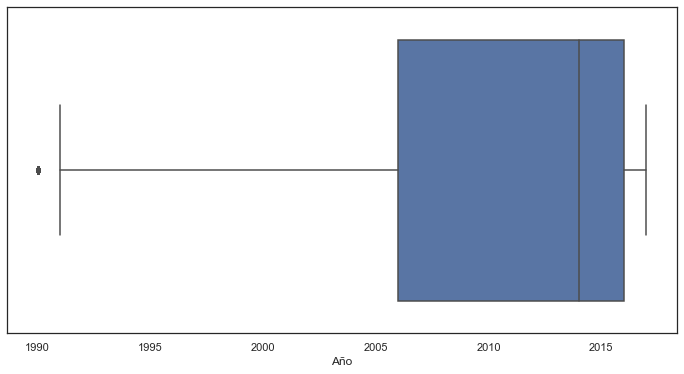

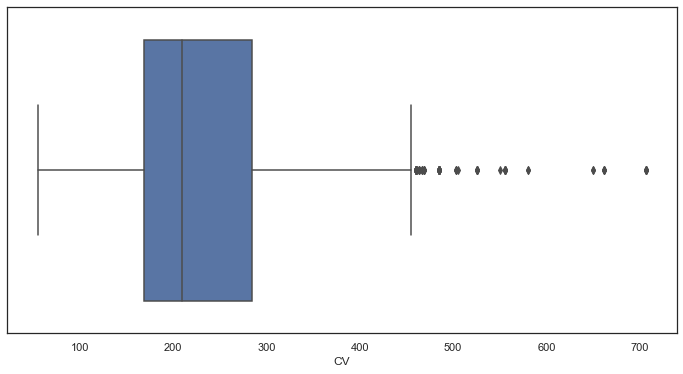

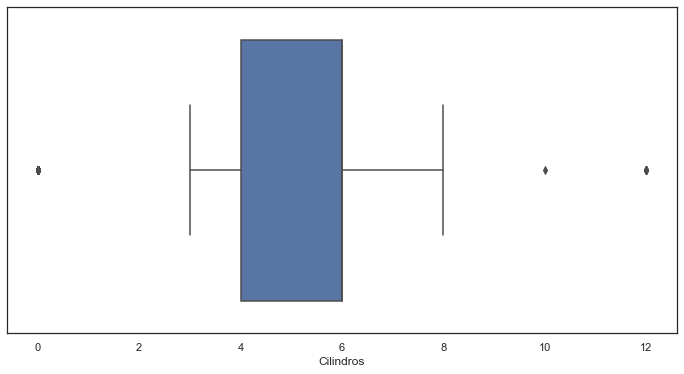

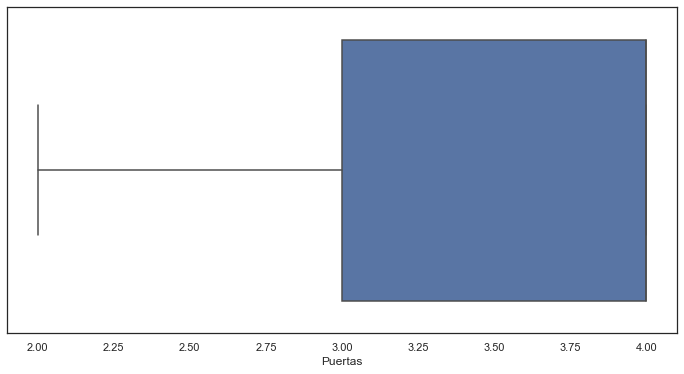

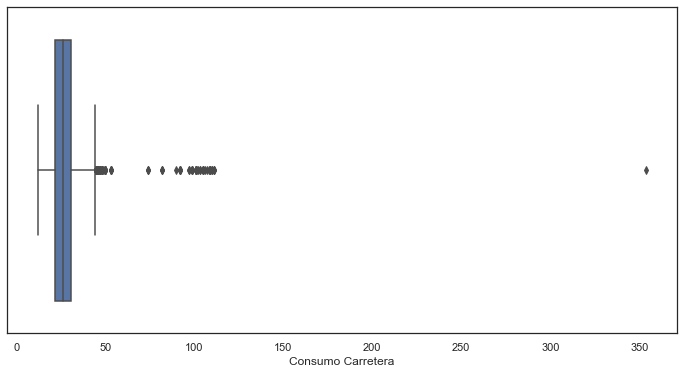

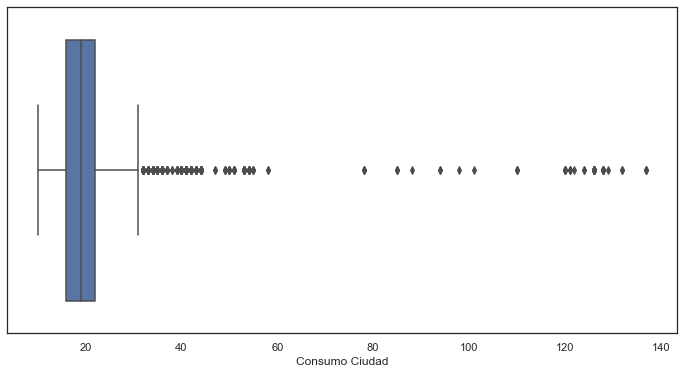

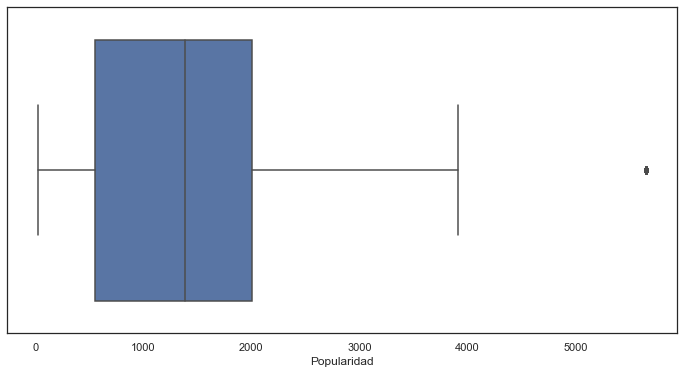

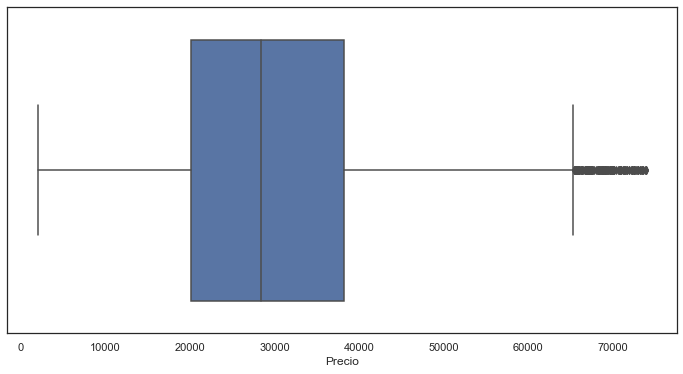

In [31]:
for i in v_df.columns:
    if v_df2[i].dtype != "O":
        fig, ax = plt.subplots(figsize=(12,6))
        sns.boxplot(data=v_df2, x=i)

### 4.3 Preprocesamiento de los datos

Crearemos variables dummies para convertir aquellas features categóricas en numéricas para posteriormente modelar los datos. Para estandarizar los datos, utilizaremos de la librería scikit-learn, la clase Standard Scaler.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Al analizar detenidamente el conjunto de datos, se pudo observar que la columna **Popularidad** y la columna **Marca** están relacionadas. Tienen los mismos valores únicos, y cada **Marca** contiene un valor único de **Popularidad**, por lo tanto se puede eliminar del conjunto de datos la columna **Marca** antes del modelado y trabajar sólo con la numérica (**Popularidad**). 

Esto nos permite tener menos columnas a la hora de desarrollo del modelo, minimizando la creación de variables dummies, y trabajando con variables numéricas en cambio.

In [35]:
for pop in v_df2["Marca"].unique():
    print("Valores únicos de Popularidad en {}, columna Marca: {}".format(pop, v_df2[v_df2["Marca"] == pop]["Popularidad"].unique()))

Valores únicos de Popularidad en BMW, columna Marca: [3916]
Valores únicos de Popularidad en Audi, columna Marca: [3105]
Valores únicos de Popularidad en FIAT, columna Marca: [819]
Valores únicos de Popularidad en Mercedes-Benz, columna Marca: [617]
Valores únicos de Popularidad en Chrysler, columna Marca: [1013]
Valores únicos de Popularidad en Nissan, columna Marca: [2009]
Valores únicos de Popularidad en Volvo, columna Marca: [870]
Valores únicos de Popularidad en Mazda, columna Marca: [586]
Valores únicos de Popularidad en Mitsubishi, columna Marca: [436]
Valores únicos de Popularidad en Alfa Romeo, columna Marca: [113]
Valores únicos de Popularidad en Toyota, columna Marca: [2031]
Valores únicos de Popularidad en Pontiac, columna Marca: [210]
Valores únicos de Popularidad en Porsche, columna Marca: [1715]
Valores únicos de Popularidad en Saab, columna Marca: [376]
Valores únicos de Popularidad en GMC, columna Marca: [549]
Valores únicos de Popularidad en Hyundai, columna Marca: [1

Se procede a separar los datos en variables independiente o predictoras y variable dependiente u objetivo.

In [36]:
X = v_df2.drop(["Precio", "Marca"], axis=1)
y = v_df2["Precio"]

Se crean variables dummies para cada variable categórica del conjunto de datos.

In [37]:
X_dummy = pd.get_dummies(X, drop_first=True)

Se separan en datos de entrenamiento y datos de prueba antes de estandarizar los mismos, y después de crear las variables dummies. 

Al contener tantas variables categóricas, puede que al crear las variables dummies luego de separar los datos, no se distribuyan las variables categóricas de manera uniforme.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, random_state = 50)

In [39]:
scaler = StandardScaler()

In [40]:
X_train_escalado = scaler.fit_transform(X_train)
X_test_escalado = scaler.transform(X_test)

## 5. Desarrollo y Evaluación del Modelo

Importamos las librerías necesarias.

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

Se procede a estimar la evaluación de un conjunto de modelos para determinar el más idóneo para el conjunto de datos. 

C:\ProgramData\anaconda3\envs\machine_learning_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361425740.1393509, tolerance: 174804268.74298862
  positive)
C:\ProgramData\anaconda3\envs\machine_learning_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273275126.686882, tolerance: 174072258.85967976
  positive)
C:\ProgramData\anaconda3\envs\machine_learning_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320289960.07292175, tolerance: 172927992.1381922
  positive)
C:\ProgramData\anaconda3\envs\machine_learning_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: Conv

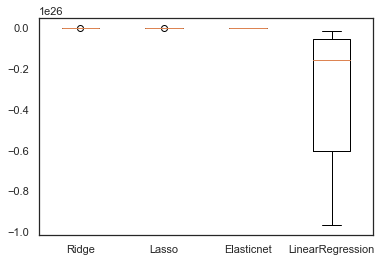

In [42]:
# Se definen los modelos en el diccionario
modelos = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elasticnet": ElasticNet(),
    "LinearRegression": LinearRegression()
}

resultados = []
labels = list(modelos.keys())

# Se realiza cross validation en cada modelo para determinar el que tenga mejores resultados
for modelo in modelos.values():
    kf = KFold(n_splits=6, shuffle=True, random_state=23)
    cv_resultados = cross_val_score(modelo, X_train_escalado, y_train, cv=kf)
    resultados.append(cv_resultados)

# Se grafican los resultados
plt.boxplot(resultados, labels=labels)
plt.show()

La regresión lineal con valores negativos puede deberse a sesgo o sobreajuste. Eliminar algunas features puede resolver el problema, pero dado que nuestros modelos de regularización están funcionando bien, simplemente vamos a excluir el modelo de regresión lineal de la ecuación, por su bajo score y su dificultad para trabajar con tantas features. 

Analizamos los gráficos nuevamente, para determinar cuál es el mejor.

C:\ProgramData\anaconda3\envs\machine_learning_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361425740.1393509, tolerance: 174804268.74298862
  positive)
C:\ProgramData\anaconda3\envs\machine_learning_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273275126.686882, tolerance: 174072258.85967976
  positive)
C:\ProgramData\anaconda3\envs\machine_learning_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320289960.07292175, tolerance: 172927992.1381922
  positive)
C:\ProgramData\anaconda3\envs\machine_learning_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: Conv

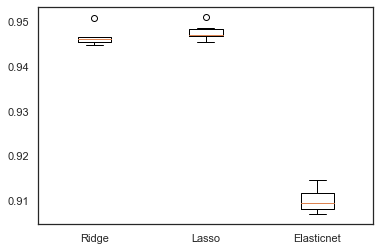

In [43]:
modelos = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elasticnet": ElasticNet()
}

resultados = []
labels = list(modelos.keys())


for modelo in modelos.values():
    kf = KFold(n_splits=6, shuffle=True, random_state=23)
    cv_resultados = cross_val_score(modelo, X_train_escalado, y_train, cv=kf)
    resultados.append(cv_resultados)


plt.boxplot(resultados, labels=labels)
plt.show()

In [44]:
# Mejor score de prueba para cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train_escalado, y_train)
    y_pred = modelo.predict(X_test_escalado)
    modelo_score = modelo.score(X_test_escalado, y_test)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("{} Puntuación Coef. Determinación: {}".format(nombre, round(modelo_score,3)))
    print("{} RMSE: {}".format(nombre, round(test_rmse,3)))
    print("--------------------------------------------------")

Ridge Puntuación Coef. Determinación: 0.949
Ridge RMSE: 3585.653
--------------------------------------------------


C:\ProgramData\anaconda3\envs\machine_learning_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422837998.75971985, tolerance: 208382783.8145444
  positive)


Lasso Puntuación Coef. Determinación: 0.95
Lasso RMSE: 3575.532
--------------------------------------------------
Elasticnet Puntuación Coef. Determinación: 0.918
Elasticnet RMSE: 4548.797
--------------------------------------------------


Todos los modelos parecen ser muy buenos para el conjunto de datos, pero para fines de este caso práctico, vamos a utilizar el modelo de Lasso.

Aplicaremos la herramienta RandomizedSearchCV para realizar validación cruzada en el modelo de Lasso y determinar los mejores hiperparámetros del mismo. 

In [46]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)
params = {"alpha": np.logspace(-10, 3, 200),
         "tol": np.linspace(0.0001, 1.0, 50),
         "max_iter": np.arange(1000,3000)}

lasso_rcv = RandomizedSearchCV(modelos["Lasso"], params, cv=kf, n_iter=100)

lasso_rcv.fit(X_train_escalado, y_train)

print("Mejores parámetros para el modelo de Lasso: {}".format(lasso_rcv.best_params_))
print("Mejor puntuación para el modelo: {}".format(lasso_rcv.best_score_))

C:\ProgramData\anaconda3\envs\machine_learning_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27228006005.834183, tolerance: 166932094.99212947
  positive)
C:\ProgramData\anaconda3\envs\machine_learning_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24080840510.617702, tolerance: 167087163.31203803
  positive)
C:\ProgramData\anaconda3\envs\machine_learning_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27808975131.683537, tolerance: 165677211.0227075
  positive)
C:\ProgramData\anaconda3\envs\machine_learning_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: C

Mejores parámetros para el modelo de Lasso: {'tol': 0.02050612244897959, 'max_iter': 2105, 'alpha': 9.437878277775392}
Mejor puntuación para el modelo: 0.9487888001609847


Luego de determinar los mejores hiperparámetros, vamos a proceder a aplicar los mismos al modelo.

In [47]:
best_params = lasso_rcv.best_params_

In [48]:
lasso = Lasso(alpha= best_params["alpha"], max_iter=best_params["max_iter"], tol=best_params["tol"])
lasso.fit(X_train_escalado, y_train)
print("{} Puntuación Coef. Determinación: {}".format("Lasso", round(lasso.score(X_test_escalado, y_test),3)))

Lasso Puntuación Coef. Determinación: 0.948


Predecimos en los datos de test, con el modelo entrenado y graficamos.

Coef. Determinacion (R2): 0.9480359102978638
Error cuadrático medio (MSE): 13159316.978160901
Raíz del Error cuadrático medio (RMSE): 3627.577287689526


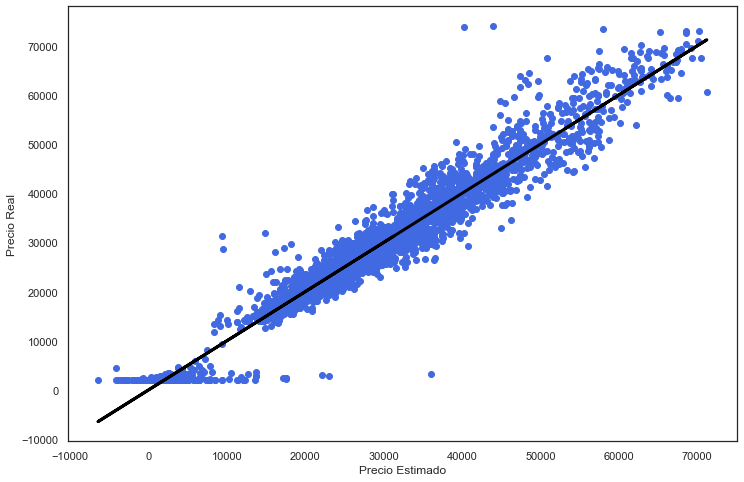

In [49]:
# Predicción con el mejor modelo entrenado
y_pred = lasso.predict(X_test_escalado)

print("Coef. Determinacion (R2): {}".format(lasso.score(X_test_escalado, y_test)))
print("Error cuadrático medio (MSE): {}".format(mean_squared_error(y_test, y_pred)))
print("Raíz del Error cuadrático medio (RMSE): {}".format(mean_squared_error(y_test, y_pred,squared=False)))


fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_pred, y_test,  color='royalblue')
plt.plot(y_pred, y_pred, color='black', linewidth=3)

plt.xlabel('Precio Estimado')
plt.ylabel('Precio Real')
plt.show()

Vemos cómo se encuentran los valores de predicción con los de test.

In [50]:
predict_df = pd.DataFrame({"Prueba": y_test, "Predicción": y_pred})
predict_df.head(10)

,Prueba,Predicción
10524,31415,31282.537131
2141,20475,20765.825274
10346,28060,28635.090735
6869,39010,42264.819567
10220,32765,36339.396146
11366,16100,16428.099572
9451,26460,31210.971861
10959,47975,39628.309141
4930,25040,25143.212736
5734,42680,35717.762700


Vemos cuáles son los coeficientes que mas influyen en el modelo.

In [51]:
# Coeficientes del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': lasso.coef_}
                  )
df_coeficientes.sort_values(by="coef", ascending=False)

,predictor,coef
0,Año,8523.429011
1,CV,5446.561455
805,Combustible_premium unleaded (required),1160.367362
879,Estilo_Convertible,1157.991980
498,Modelo_Navigator,910.686850
...,...,...
813,Tracción_rear wheel drive,-647.256060
806,Combustible_regular unleaded,-771.593793
727,Modelo_Tundra,-840.681044
318,Modelo_Frontier,-872.556020
